In [73]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix, roc_curve, auc
from sklearn.metrics import roc_auc_score
from sklearn.preprocessing import label_binarize

In [3]:
# Load the Excel file
xls = pd.ExcelFile('glass.xlsx')
# Turn the second sheet into a DataFrame
df = pd.read_excel(xls, 'glass')
df

RI     Na    Mg    Al     Si     K    Ca    Ba   Fe  Type
0    1.52101  13.64  4.49  1.10  71.78  0.06  8.75  0.00  0.0     1
1    1.51761  13.89  3.60  1.36  72.73  0.48  7.83  0.00  0.0     1
2    1.51618  13.53  3.55  1.54  72.99  0.39  7.78  0.00  0.0     1
3    1.51766  13.21  3.69  1.29  72.61  0.57  8.22  0.00  0.0     1
4    1.51742  13.27  3.62  1.24  73.08  0.55  8.07  0.00  0.0     1
..       ...    ...   ...   ...    ...   ...   ...   ...  ...   ...
209  1.51623  14.14  0.00  2.88  72.61  0.08  9.18  1.06  0.0     7
210  1.51685  14.92  0.00  1.99  73.06  0.00  8.40  1.59  0.0     7
211  1.52065  14.36  0.00  2.02  73.42  0.00  8.44  1.64  0.0     7
212  1.51651  14.38  0.00  1.94  73.61  0.00  8.48  1.57  0.0     7
213  1.51711  14.23  0.00  2.08  73.36  0.00  8.62  1.67  0.0     7

[214 rows x 10 columns]

#EDA

In [5]:
df.shape

(214, 10)

In [8]:
df.isna().sum()

RI      0
Na      0
Mg      0
Al      0
Si      0
K       0
Ca      0
Ba      0
Fe      0
Type    0
dtype: int64

In [10]:
df[df.duplicated()]

RI     Na    Mg    Al     Si     K    Ca   Ba   Fe  Type
39  1.52213  14.21  3.82  0.47  71.77  0.11  9.57  0.0  0.0     1

In [14]:
df = df.drop_duplicates(keep='first')

In [15]:
df[df.duplicated()]

Empty DataFrame
Columns: [RI, Na, Mg, Al, Si, K, Ca, Ba, Fe, Type]
Index: []

In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 213 entries, 0 to 213
Data columns (total 10 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   RI      213 non-null    float64
 1   Na      213 non-null    float64
 2   Mg      213 non-null    float64
 3   Al      213 non-null    float64
 4   Si      213 non-null    float64
 5   K       213 non-null    float64
 6   Ca      213 non-null    float64
 7   Ba      213 non-null    float64
 8   Fe      213 non-null    float64
 9   Type    213 non-null    int64  
dtypes: float64(9), int64(1)
memory usage: 18.3 KB


#Data Visualization

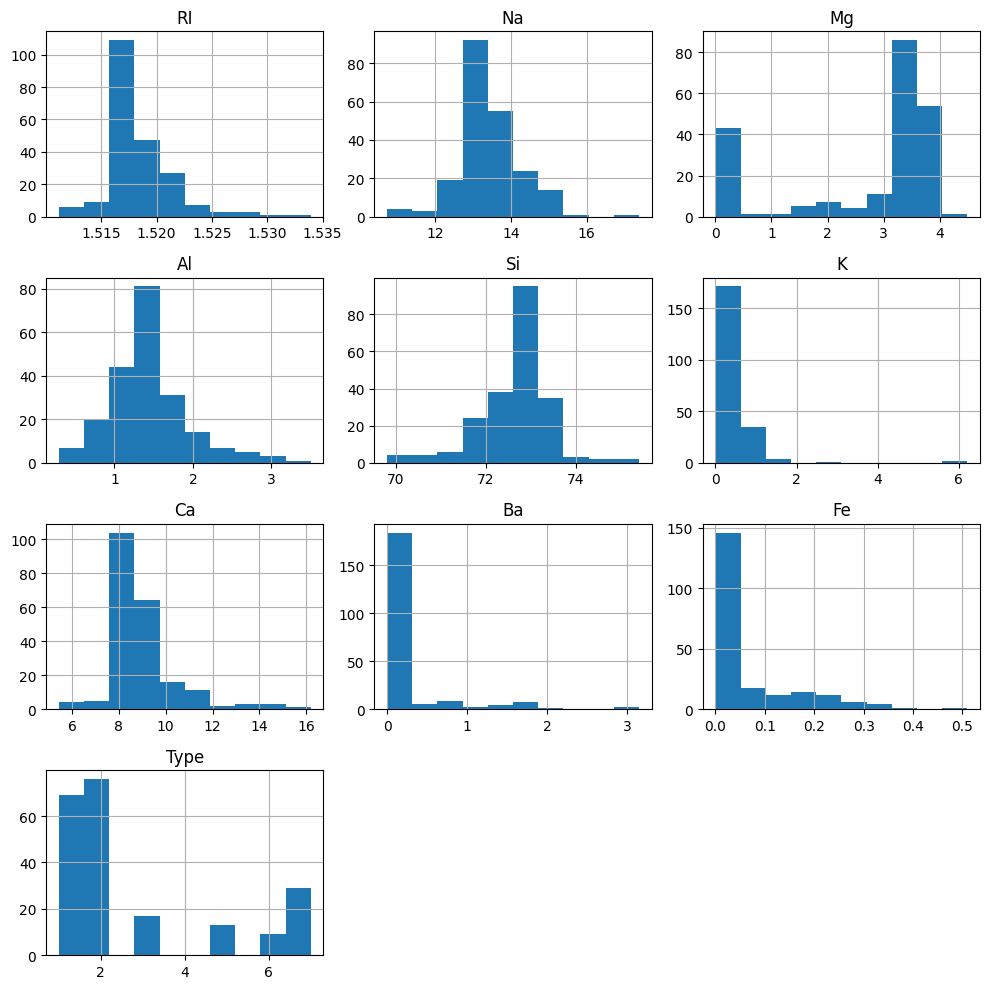

In [20]:
#Generating histograms
df.hist(figsize=(10, 10))  # Adjust figsize as needed
plt.tight_layout()  # To prevent overlapping labels
plt.show()

In [ ]:
#Most variables have skewed distributions with significant kurtosis. Most have outliers.

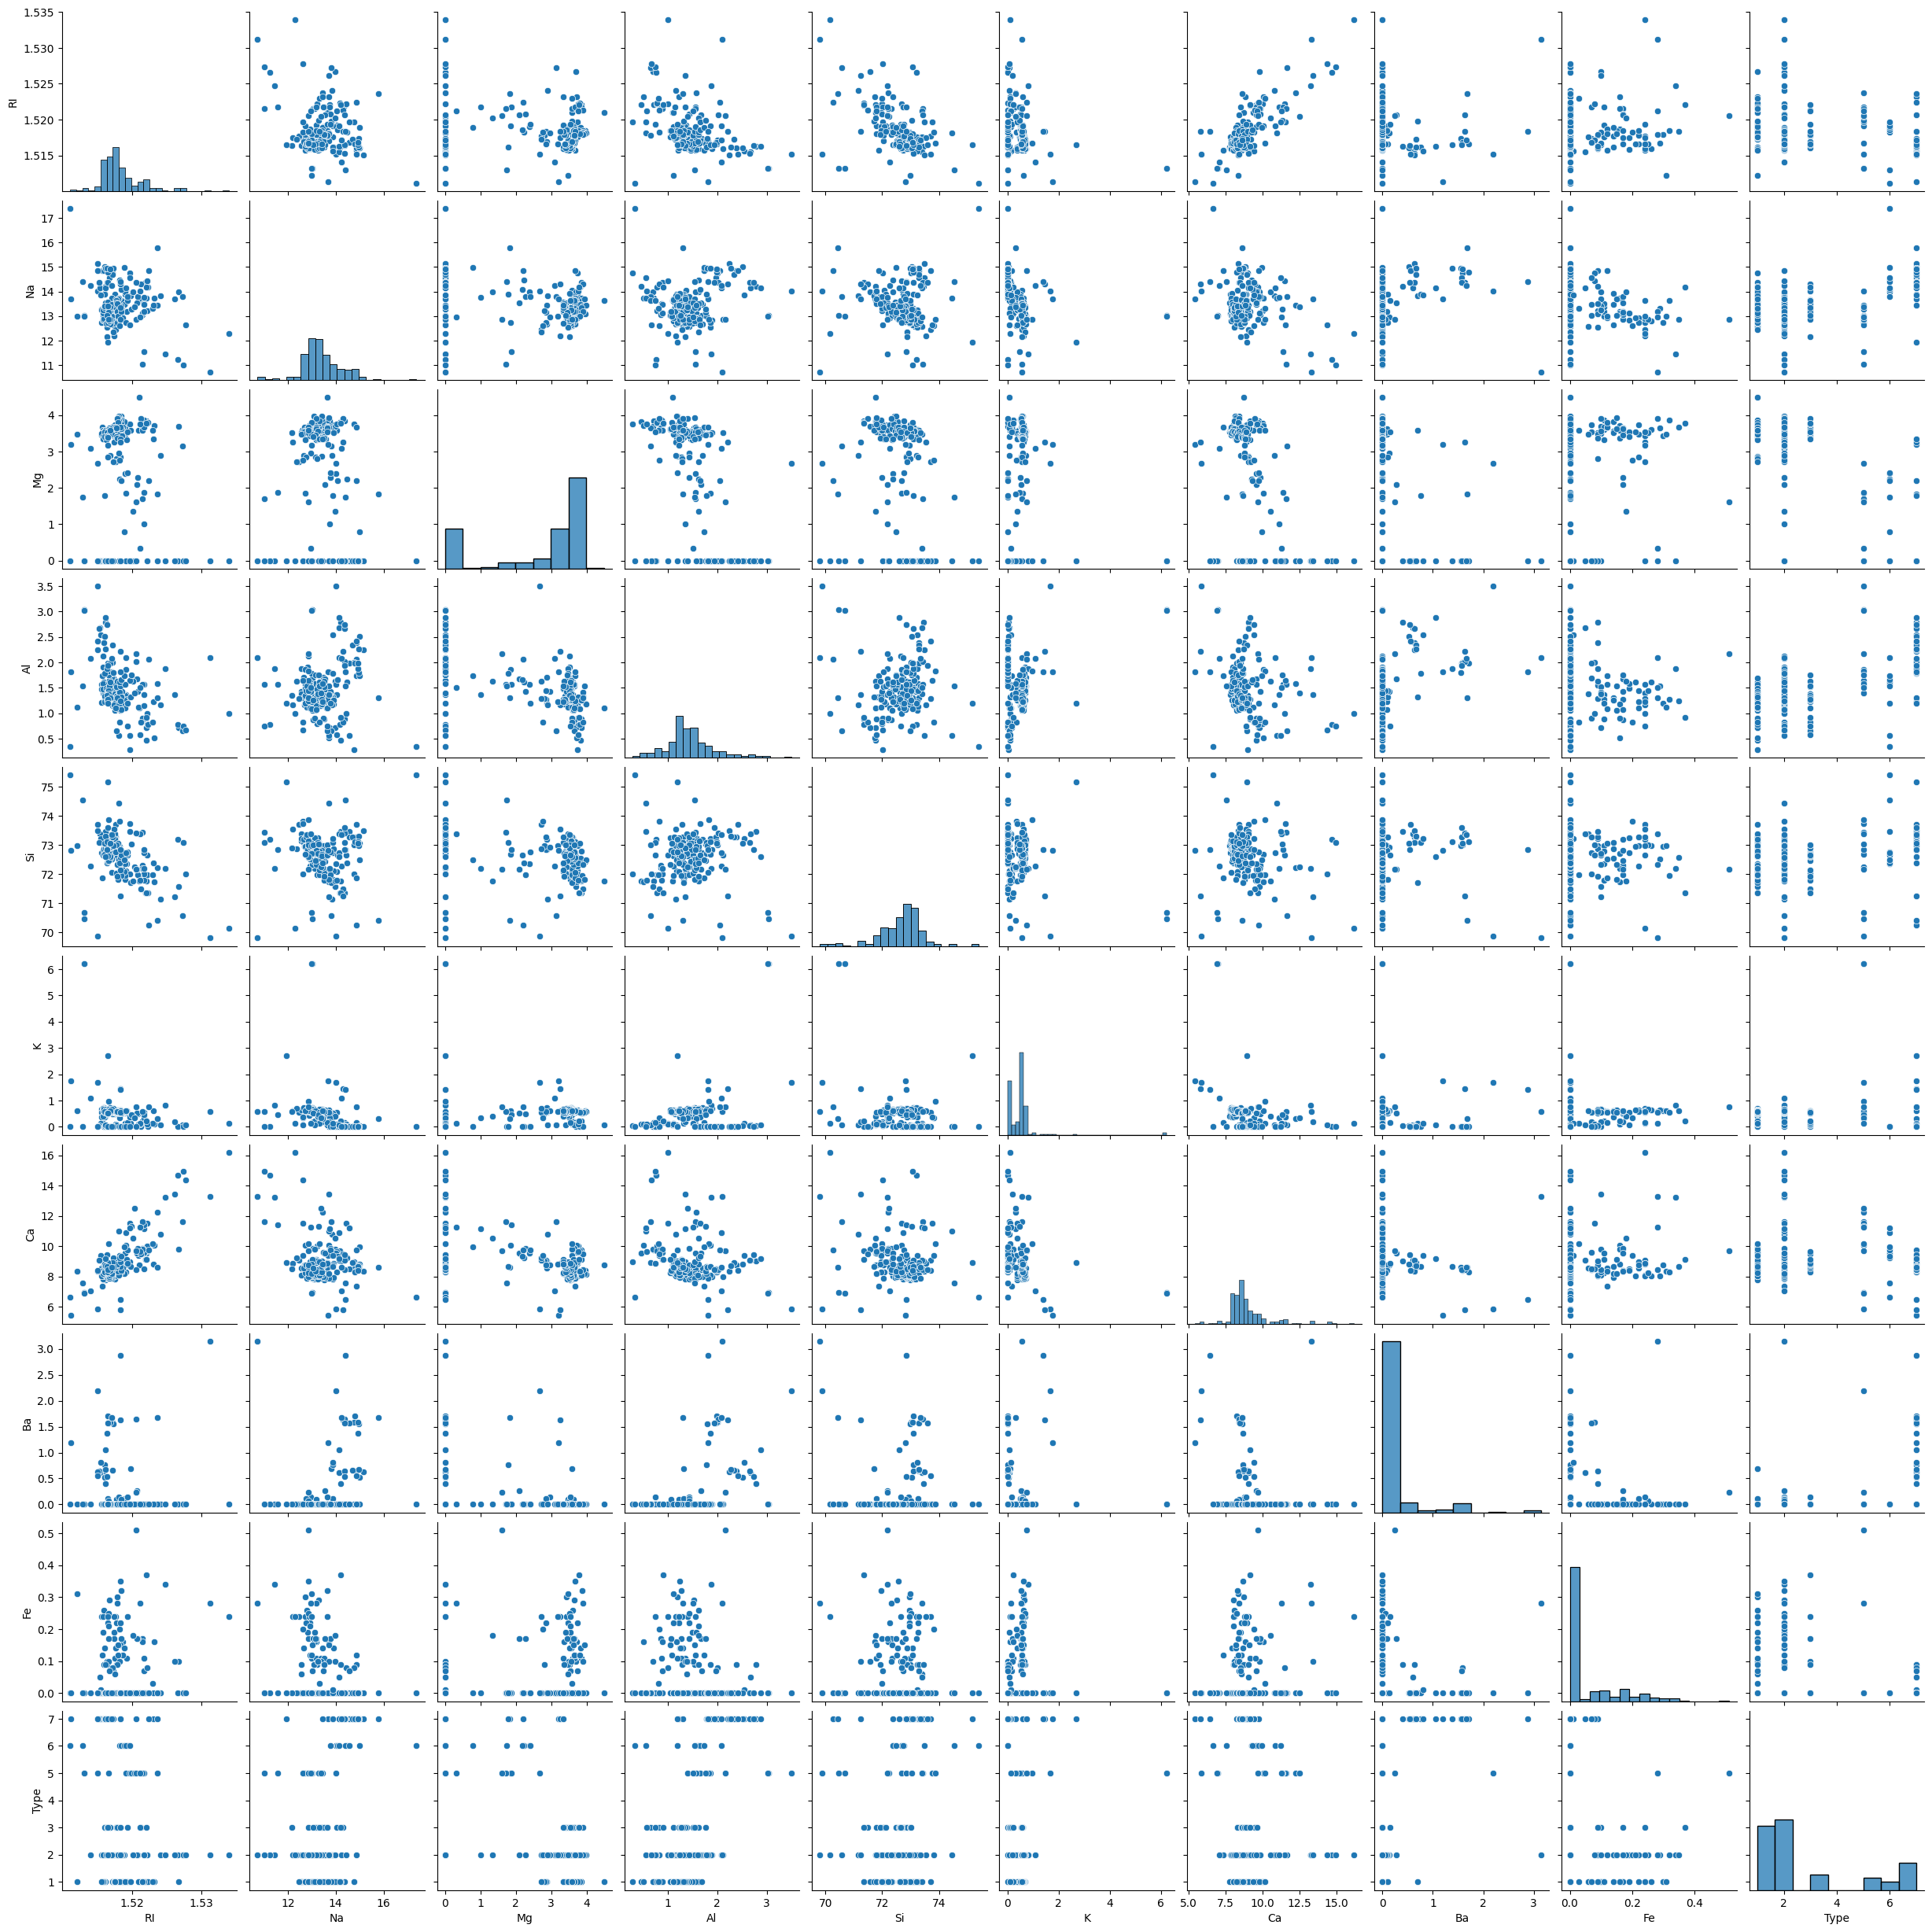

In [22]:
sns.pairplot(df)

plots with aluminium and silicon sem to have slight slopes. Calcium and RI have a positibe slope.

#Data preprocessing

In [25]:
x = df.drop('Type', axis=1)
y = df['Type']

column_names = x.columns

In [26]:
scaler = StandardScaler()
scaled_x = scaler.fit_transform(x)

#Random Forest Model Implementation

In [29]:
X = scaled_x
Y = y.values

# Splitting data into training and testing data set
x_train, x_test,y_train,y_test = train_test_split(X,Y, test_size=0.2,random_state=40)

In [64]:
# Random Forest Classification
num_trees = 100
max_features = 3 #k-value where k<<m
kfold = KFold(n_splits=8, shuffle=False) #shuffle-False so no random state mentioned

model = RandomForestClassifier(n_estimators=num_trees, max_features=max_features)
results = cross_val_score(model, x_train, y_train, cv=kfold)
print(results.mean())

0.8054653679653679


In [65]:
model.fit(x_train, y_train)

RandomForestClassifier(max_features=3)

In [66]:
preds = model.predict(x_test) # predicting on test data set
pd.Series(preds).value_counts()

2    16
1    15
7     6
6     2
3     2
5     2
Name: count, dtype: int64

In [67]:
preds

array([2, 1, 2, 7, 6, 3, 1, 2, 7, 1, 1, 3, 2, 2, 2, 2, 1, 2, 7, 1, 1, 1,
       1, 2, 7, 7, 5, 2, 1, 5, 1, 1, 2, 1, 1, 2, 6, 2, 1, 2, 2, 7, 2])

In [68]:
pd.crosstab(y_test,preds) # getting the 2 way table to understand the correct and wrong predictions

col_0   1   2  3  5  6  7
row_0                    
1      10   2  1  0  0  0
2       3  13  0  1  0  1
3       2   0  1  0  0  0
5       0   0  0  1  0  0
6       0   1  0  0  2  0
7       0   0  0  0  0  5

In [71]:
accuracy = accuracy_score(y_test,preds)
print(f"Accuracy: {accuracy}")

precision = precision_score(y_test, preds, average='weighted')  # Use 'weighted' for multi-class
print(f"Precision: {precision}")

recall = recall_score(y_test, preds, average='weighted')
print(f"Recall: {recall}")

f1 = f1_score(y_test, preds, average='weighted')
print(f"F1-score: {f1}")

Accuracy: 0.7441860465116279
Precision: 0.75484496124031
Recall: 0.7441860465116279
F1-score: 0.740989334422987


In [74]:
# Binarize the target labels
y_test_bin = label_binarize(y_test, classes=np.unique(y_test))

# Get predicted probabilities for each class
y_prob = model.predict_proba(x_test)

# Calculate ROC-AUC for each pair of classes and average
roc_auc_ovo = roc_auc_score(y_test_bin, y_prob, average='macro', multi_class='ovo')
print(f"ROC-AUC (OvO): {roc_auc_ovo}")

ROC-AUC (OvO): 0.9558796296296297




*   On average, this model correctly predicts the glass type about 80.55% of the time during cross-validation.
Cross-validation helps to estimate how well this model will generalize to unseen data.

*   The proportion of correctly classified instances out of the total instances in the test set, accuracy of the model, is 74.42% on the test data.
*   The proportion of correctly predicted positive instances out of all instances predicted as positive, precision is 75.48%. High precision means that when this model predicts a certain glass type, it is likely to be correct.


*   Recall, the proportion of correctly predicted positive instances out of all actual positive instances is 74.42%. High recall means that this model is able to identify most of the actual positive instances.



*   F1-score is of about 74.10%. This is the harmonic mean of precision and recall. This indicates balanced performance.  
*   high ROC-AUC of 95.59%. indicates better discrimination between different classes.

Overall, it is a well-performing model. The cross-validation accuracy (80.55%) is higher than the test accuracy (74.42%), which might indicate some overfitting on the training data.




#Bagging

In [75]:
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier

In [77]:
seed = 7
#kfold = KFold(n_splits=8, shuffle=False)

cart = DecisionTreeClassifier()
num_trees = 100
bag_model = BaggingClassifier(estimator=cart, n_estimators=num_trees, random_state=seed)
bag_results = cross_val_score(bag_model, X, Y, cv=kfold)
print(bag_results.mean())

0.36680911680911676


In [78]:
bag_model.fit(x_train, y_train)
bag_preds = bag_model.predict(x_test) # predicting on test data set
pd.Series(bag_preds).value_counts()

2    17
1    11
7     6
3     5
6     2
5     2
Name: count, dtype: int64

In [79]:
pd.crosstab(y_test,bag_preds)

col_0  1   2  3  5  6  7
row_0                   
1      8   4  1  0  0  0
2      2  12  2  1  0  1
3      1   0  2  0  0  0
5      0   0  0  1  0  0
6      0   1  0  0  2  0
7      0   0  0  0  0  5

In [80]:
bag_accuracy = accuracy_score(y_test,bag_preds)
print(f"Accuracy: {bag_accuracy}")

bag_precision = precision_score(y_test, bag_preds, average='weighted')  # Use 'weighted' for multi-class
print(f"Precision: {bag_precision}")

bag_recall = recall_score(y_test, bag_preds, average='weighted')
print(f"Recall: {bag_recall}")

bag_f1 = f1_score(y_test, bag_preds, average='weighted')
print(f"F1-score: {f1}")

Accuracy: 0.6976744186046512
Precision: 0.7215603366082163
Recall: 0.6976744186046512
F1-score: 0.740989334422987


In [81]:
# Get predicted probabilities for each class
bag_y_prob = bag_model.predict_proba(x_test)

# Calculate ROC-AUC for each pair of classes and average
bag_roc_auc_ovo = roc_auc_score(y_test_bin, bag_y_prob, average='macro', multi_class='ovo')
print(f"ROC-AUC (OvO): {bag_roc_auc_ovo}")

ROC-AUC (OvO): 0.9389814814814814


#Boosting

In [82]:
from sklearn.ensemble import AdaBoostClassifier

In [83]:
num_trees = 10
seed=7
#kfold = KFold(n_splits=10, random_state=seed)

boost_model = AdaBoostClassifier(n_estimators=num_trees, random_state=seed)
boost_results = cross_val_score(boost_model, X, Y, cv=kfold)
print(boost_results.mean())

0.07888176638176637


In [84]:
boost_model.fit(x_train, y_train)
boost_preds = boost_model.predict(x_test)
pd.Series(boost_preds).value_counts()

2    29
7    10
1     2
5     2
Name: count, dtype: int64

In [85]:
pd.crosstab(y_test, boost_preds)

col_0  1   2  5  7
row_0             
1      1  12  0  0
2      0  15  0  3
3      1   2  0  0
5      0   0  0  1
6      0   0  2  1
7      0   0  0  5

In [86]:
boost_accuracy = accuracy_score(y_test, boost_preds)  # 'bag_accuracy' to 'boost_accuracy', 'bag_preds' to 'boost_preds'
print(f"Accuracy: {boost_accuracy}")

boost_precision = precision_score(y_test, boost_preds, average='weighted')  # 'bag_precision' to 'boost_precision', 'bag_preds' to 'boost_preds'
print(f"Precision: {boost_precision}")

boost_recall = recall_score(y_test, boost_preds, average='weighted')  # 'bag_recall' to 'boost_recall', 'bag_preds' to 'boost_preds'
print(f"Recall: {boost_recall}")

boost_f1 = f1_score(y_test, boost_preds, average='weighted')  # 'bag_f1' to 'boost_f1', 'bag_preds' to 'boost_preds'

# Get predicted probabilities for each class
boost_y_prob = boost_model.predict_proba(x_test)  # 'bag_y_prob' to 'boost_y_prob', 'bag_model' to 'boost_model'

# Calculate ROC-AUC for each pair of classes and average
boost_roc_auc_ovo = roc_auc_score(y_test_bin, boost_y_prob, average='macro', multi_class='ovo')  # 'bag_roc_auc_ovo' to 'boost_roc_auc_ovo', 'bag_y_prob' to 'boost_y_prob'
print(f"ROC-AUC (OvO): {boost_roc_auc_ovo}")

Accuracy: 0.4883720930232558
Precision: 0.42582197273456296
Recall: 0.4883720930232558
ROC-AUC (OvO): 0.8417809748730801


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


keeping k = 8 for fair comparison across models, we can say that:

Random Forest:

Shows the best overall performance in terms of accuracy, precision, recall, and ROC-AUC.
Achieved the highest cross-validation accuracy, indicating good generalization ability.


Bagging:

Performed moderately well but is significantly behind the Random Forest in most metrics.
Notably lower cross-validation accuracy suggests potential issues with overfitting or instability.


Boosting:

Has the lowest performance across all metrics.
The extremely low cross-validation accuracy is a major concern, indicating that the model is not generalizing well.

Changing the K values and hypertuning the bagging and boosting models may show better performance.


> Explain Bagging and Boosting methods. How

Bagging (Bootstrap Aggregating) and Boosting are ensemble methods using multiple base learners, usually decision trees, to improve model performance. Bagging reduces variance and overfitting by training base learners on bootstrapped subsets of the data independently and combining predictions through majority voting or averaging. Boosting, on the other hand, reduces bias and underfitting by sequentially training base learners, focusing on correcting mistakes of previous learners using weighted instances and combining predictions through weighted voting, favoring better learners.

> Explain how to handle imbalance in the data.

Imbalanced data, where one class has significantly fewer instances, can be addressed through various techniques. Resampling involves oversampling the minority class (e.g., using SMOTE) or undersampling the majority class. Cost-sensitive learning assigns different misclassification costs to classes. Ensemble methods like Bagging and Boosting, especially with balanced bootstrapping or weighted instances, can also be effective. Finally, using appropriate evaluation metrics like Precision, Recall, F1-score, and AUC is crucial for assessing model performance on imbalanced data.


